In [1]:
import tensorflow as tf

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 형태 출력
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


In [2]:
# 하이퍼파라미터 설정
batch_size = 1024
epochs = 10
learning_rate = 0.001

# MNIST 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 데이터셋 준비 (tf.data.Dataset 사용)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

In [3]:
# 모델 클래스 정의
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # Convolutional Layer 1
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
        # MaxPooling Layer 1
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
        # Convolutional Layer 2
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        # MaxPooling Layer 2
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))
        # Flatten Layer
        self.flatten = tf.keras.layers.Flatten()
        # Fully Connected Layer
        self.fc1 = tf.keras.layers.Dense(128, activation='relu')
        # Output Layer
        self.fc2 = tf.keras.layers.Dense(10, activation='softmax')

    def __call__(self, x):
        # Forward pass through the network
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)

In [4]:
# 모델 및 옵티마이저 정의
model = MyModel()
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
loss_fn = tf.losses.CategoricalCrossentropy()
metric = tf.metrics.Accuracy()

In [5]:
from tqdm.notebook import tqdm

# 사용자 정의 훈련 루프
for epoch in tqdm(range(epochs), desc="Epochs"):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # 정확도 메트릭 초기화 (매 에포크 시작 시)
    metric.reset_state()
    
    # 훈련 단계 (배치별 진행 상황을 추적)
    for x_batch_train, y_batch_train in tqdm(train_dataset, desc=f"Training Epoch {epoch+1}", leave=False):
        with tf.GradientTape() as tape:
            # Forward pass
            y_pred = model(x_batch_train)
            # 손실 계산
            loss = loss_fn(y_batch_train, y_pred)

        # 그라디언트 계산 및 가중치 업데이트
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # 평가 단계
    total_loss = 0.0
    total_samples = 0
    
    for x_batch_test, y_batch_test in tqdm(test_dataset, desc=f"Evaluating Epoch {epoch+1}", leave=False):
        y_pred_test = model(x_batch_test)
        y_pred_labels = tf.argmax(y_pred_test, axis=1)
        y_batch_labels = tf.argmax(y_batch_test, axis=1)
           
        # 정확도 업데이트
        metric.update_state(y_batch_labels, y_pred_labels)

        # 테스트 손실 계산
        batch_loss = loss_fn(y_batch_test, y_pred_test).numpy()
        total_loss += batch_loss * x_batch_test.shape[0]  # 배치 손실 * 배치 크기
        total_samples += x_batch_test.shape[0]  # 배치 크기 누적
    
    # 평균 테스트 손실 계산
    avg_loss = total_loss / total_samples
    
    print(f"Test Accuracy after epoch {epoch + 1}: {metric.result().numpy():.4f}")
    print(f"Test loss after epoch {epoch + 1}: {avg_loss:.4f}")
    print()

print('Learning finished')


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10


Training Epoch 1:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 1:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 1: 0.9432
Test loss after epoch 1: 0.2014

Epoch 2/10


Training Epoch 2:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 2:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 2: 0.9685
Test loss after epoch 2: 0.1070

Epoch 3/10


Training Epoch 3:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 3:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 3: 0.9777
Test loss after epoch 3: 0.0751

Epoch 4/10


Training Epoch 4:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 4:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 4: 0.9798
Test loss after epoch 4: 0.0638

Epoch 5/10


Training Epoch 5:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 5:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 5: 0.9823
Test loss after epoch 5: 0.0565

Epoch 6/10


Training Epoch 6:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 6:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 6: 0.9840
Test loss after epoch 6: 0.0505

Epoch 7/10


Training Epoch 7:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 7:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 7: 0.9852
Test loss after epoch 7: 0.0453

Epoch 8/10


Training Epoch 8:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 8:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 8: 0.9857
Test loss after epoch 8: 0.0417

Epoch 9/10


Training Epoch 9:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 9:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 9: 0.9864
Test loss after epoch 9: 0.0392

Epoch 10/10


Training Epoch 10:   0%|          | 0/59 [00:00<?, ?it/s]

Evaluating Epoch 10:   0%|          | 0/10 [00:00<?, ?it/s]

Test Accuracy after epoch 10: 0.9870
Test loss after epoch 10: 0.0371

Learning finished


# 강의자료 재현

In [6]:
linear = tf.keras.layers.Dense(10, activation=None)

criterion = tf.losses.CategoricalCrossentropy()
optimizer = tf.optimizers.SGD(learning_rate=0.0001)

training_epochs = 15
avg_cost = 0

for epoch in range(training_epochs):
    for X,Y in train_dataset:
        X = tf.reshape(X, shape=(-1, 28*28))
        with tf.GradientTape() as tape:
            hypothesis = linear(X)
            loss = criterion(Y, hypothesis)
        gradients = tape.gradient(loss, linear.trainable_variables)
        optimizer.apply_gradients(zip(gradients, linear.trainable_variables))
    
        avg_cost += loss/len(train_dataset)
    
    print(f'Epoch: {epoch+1}| Cost: {avg_cost: .9f}')

print('Learning Finished')

Epoch: 1| Cost:  6.595241547
Epoch: 2| Cost:  11.079387665
Epoch: 3| Cost:  14.340824127
Epoch: 4| Cost:  17.088769913
Epoch: 5| Cost:  19.564792633
Epoch: 6| Cost:  21.914093018
Epoch: 7| Cost:  24.171522141
Epoch: 8| Cost:  26.365398407
Epoch: 9| Cost:  28.505214691
Epoch: 10| Cost:  30.581352234
Epoch: 11| Cost:  32.616886139
Epoch: 12| Cost:  34.596672058
Epoch: 13| Cost:  36.539016724
Epoch: 14| Cost:  38.451534271
Epoch: 15| Cost:  40.337684631
Learning Finished


In [7]:
metric = tf.metrics.Accuracy()
for X, Y in test_dataset:
    X = tf.reshape(X, shape=(-1, 28*28))
    
    prediction = linear(X)
    metric.update_state(tf.argmax(Y), tf.argmax(prediction))

print("Accuracy: ", metric.result().numpy())

Accuracy:  0.0


# TensorBoard

In [8]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
import os

# MNIST 데이터셋 로드 및 전처리
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터를 28x28 이미지로 변환하고 0~1 범위로 정규화
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 모델 정의
model = tf.keras.Sequential([
    layers.Input((28, 28, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 홈 디렉토리에 텐서보드 로그 파일 생성
log_dir = os.path.join(os.path.expanduser('~'), "tensorboard_logs/MNIST")
os.makedirs(log_dir, exist_ok=True)

# TensorBoard 콜백 설정
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# 모델 훈련
model.fit(x_train, y_train, epochs=20, batch_size=512,
          validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 312ms/step - accuracy: 0.7178 - loss: 0.9550 - val_accuracy: 0.9624 - val_loss: 0.1282
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 319ms/step - accuracy: 0.9669 - loss: 0.1091 - val_accuracy: 0.9681 - val_loss: 0.0949
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 37s 315ms/step - accuracy: 0.9799 - loss: 0.0663 - val_accuracy: 0.9857 - val_loss: 0.0428
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 36s 304ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accuracy: 0.9870 - val_loss: 0.0390
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 322ms/step - accuracy: 0.9869 - loss: 0.0399 - val_accuracy: 0.9885 - val_loss: 0.0354
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 37s 317ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9879 - val_loss: 0.0352
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9890 - val_loss: 0.0339
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 39s 328ms/step - accuracy: 0.9933 - loss: 0

# CIFAR-10 데이터

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import os

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 전처리: 픽셀 값을 0과 1 사이로 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블을 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [25]:
# 모델 생성
model = models.Sequential()

# 첫 번째 합성곱 층
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# 두 번째 합성곱 층
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# 세 번째 합성곱 층
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

# Fully connected 층을 위해 Flatten
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))  # 10개의 클래스이므로 출력층 노드 개수는 10개

In [26]:
# 홈 디렉토리에 텐서보드 로그 파일 생성
log_dir = os.path.join(os.path.expanduser('~'), "tensorboard_logs/CIFAR10")
os.makedirs(log_dir, exist_ok=True)

# TensorBoard 콜백 설정
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [27]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test), 
                    callbacks=[tensorboard_callback])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.2984 - loss: 1.8592 - val_accuracy: 0.5443 - val_loss: 1.2647
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5472 - loss: 1.2456 - val_accuracy: 0.6110 - val_loss: 1.0894
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6372 - loss: 1.0132 - val_accuracy: 0.6575 - val_loss: 0.9747
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.6926 - loss: 0.8625 - val_accuracy: 0.6939 - val_loss: 0.8933
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7312 - loss: 0.7549 - val_accuracy: 0.7258 - val_loss: 0.7892
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7664 - loss: 0.6723 - val_accuracy: 0.7274 - val_loss: 0.7931
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7876 - loss: 0.6051 - val_accuracy: 0.7175 - val_loss: 0.8396
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8065 - loss: 0.5496 - 

313/313 - 3s - 10ms/step - accuracy: 0.7302 - loss: 1.1235
Test accuracy: 0.7301999926567078


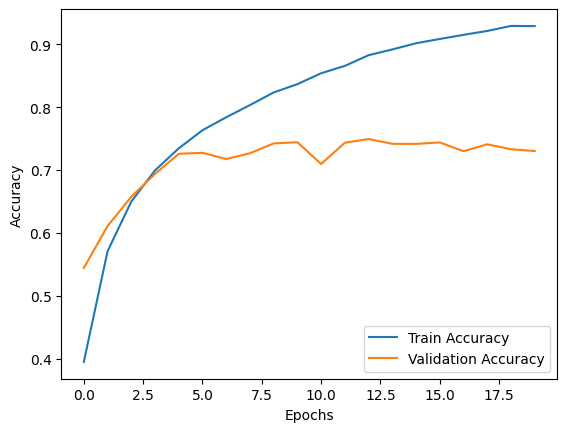

In [28]:
# 테스트 데이터로 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# 학습 과정 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()